# WGU D208 TASK 2 REV 3 - MATTINSON

<div class="title">
    Logistic Regression Using Churn Data<br>
    Mike Mattinson<br>
    Master of Science, Data Analytics, WGU.edu<br>
    D208: Predictive Modeling<br>
    Dr. Keiona Middleton<br>
    October 8, 2021<br>
</div>

<div class="impact" data-hdr="Abstract">This paper provides the results of a logistic regression analysis conducted on a customer dataset in partial fulfillment of WGU’s D208 Predictive Analysis class requirements. The dataset represents 10,000 rows of customer data for a typical services company. There are fifty (50) attributes for each customer. The provided dataset was mostly clean and ready to use, however, some few additional data cleaning steps were completed prior to running the predictive analysis. The predictive analysis includes both an initial model using all the predictor variables and a final model using a reduced set of predictor variables. The final model includes both numerical and categorical predictor variables. P-values and multi-collinearity were used to select the features used in the final model. The principal research question “how to predict customer churn with high confidence using as few predictor variables as possible” was determined (93% correct predictions) using fourteen (14) of the original attributes. The analysis was conducted in a Python environment using a Jupyter notebook. The Jupyter notebook includes both code and discussion of the analysis. Key words: Churn. Regression. Logistic Regression. Primary data set: clean_churn.csv, the initial set has 10,000 records with 50 attributes.</div>

<div class="impact" data-hdr="Partial Reuse">A large portion of this notebook is re-used from Task 1 with the noteable exception that this is a Logistic Regression instead of the Multiple Regression of Task 1. The same data was used in both tasks. Similiar formatting was used in both tasks, as I am trying to be consistent with my submissions and preparation for future thesis work.</div>
<p>In addition, I found a pretty good example of logistic regression on "towards data science" website by Susan Li (2021), a lot of the flow and code was referenced and incorporated into this notebook.

<div class="apa" data-author="Mattinson, M." data-date="2021, September" data-url="wgu.edu">WGU D208 TASK 1 REV 8 - MATTINSON</div>

<div class="apa" data-author="Li, S." data-date="2021, September" data-url="https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8">Building a Logistic Regression in Python, Step by Step</div>

<div class="impact" data-hdr="Custom Styles">In order for custom styles to be applied to this notebook, a file called "d208.css" is created within the styles subfolder of the Python project. I am including the contents of that file here for reference, it will be visible in the .ipynb file as well as the .pdf file:</div>

<div class="impact" data-hdr="Apply Custom Notebook Styles">
   Apply custom .css styles to the notebook.
    </div>

In [1]:
# Styling notebook with custom css
import os
s = os.path.join('styles','d208.css')
print('custom styles are found in {}'.format(s))
from IPython.core.display import HTML
HTML(open(s, "r").read())

custom styles are found in styles\d208.css


<div class="part">Research Question</div>

<h2 data-nbr="A1">Research Question</h2>

<div class="impact" data-hdr="Primary Research Question">
    A typical services company’s revenue is maximized based on the total number of customers and how much each of those customers pay for those services. If the company charges too much, then the customer may stop the service, this is known as churn. If the company charges too little, then it will not maximize its revenue. This analysis will attempt to predict the probability of a customer’s churn (dependent variable is ‘Churn’ which is a binary categorical data) using logistic regression with high degree of accuracy based on a minimum set of predictor variables. The final set of predictor variables should include both numeric (e.g., Tenure, Child, and Income, etc.) and categorical data (e.g., Techie, Gender, and Internet Service type, etc.).
    </div>

<h2 data-nbr="A2">Objectives and Goals</h2>

<div class="impact" data-hdr="Data Preparation">Data Preparation objectives are addressed in Part III below and include the following:</div>
<ul class="a">
    <li>Convert categorical data.
    <li>Mitigate missing data.
    <li>Select data required for the analysis.
    <li>Remove data deemed unneccesary.
    <li>Explore data.
    <li>Visualize data.
    <li>Provide copy of final data.
</ul>

<div class="impact" data-hdr="Model Analysis">Model Analysis objectives are addressed in Part IV below and include the following:</div>
<ul class="a">
    <li>Eliminate predictor variables with high p-values.
    <li>Eliminate predictor variables with high degree of multicollinearity.
    <li>Create initial model using all the data.
    <li>Refine model using a reduced set of the data.
    <li>Summarize results.  
    <li>Ensure independent and dependent variables are linear.  
    <li>Ensure independent variables are not highly collinear
    <li>Ensure final model residuals are normally distributed.  
</ul>

<div class="part">
    Method Justification
</div>

<h2 data-nbr="B1">
    Assumptions
</h2>

<div class="impact" data-hdr="Assumptions">According to Massaron and Boschetti (2019), the logistic regression analysis is based on the following assumptions:</div>
<ul class="a">
    <li><b>Binary Dependent Variable</b>. Binary logistic regression requires the dependent variable to be binary.
    <li><b>Desired Outcome</b>. For a binary regression, the factor level 1 of the dependent variable should represent
the desired outcome.
    <li><b>Only Meaningful Variables</b>. Only the meaningful variables should be included.
    <li><b>Multi-Collinearity</b>. The independent variables should be independent of each other. That is, the model
should have little or no multicollinearity. 
    <li><b>Independent Variable Linear to Log Odds</b>. The independent variables are linearly related to the log odds.
    <li><b>Large Sample Size</b>. Logistic regression requires large sample sizes.
</ul>

<div class="apa" data-author="Massaron, L., Boschetti, A." data-date="2016" data-url="https://www.packtpub.com/product/regression-analysis-with-python/9781785286315">Regression Analysis with Python</div>

<h2 data-nbr="B2">Benefits of Python/Jupyter</h2>

<div class="impact" data-hdr="Benefits of Python">I have choosen to use Python and the Jupyter notebook to complete this analysis. Python has all of the plotting (matplotlib and seaborn) and data manipulation packages (numpy, pandas and scipy) that are straight-forward and very easy to use. Jupyter notebooks allows segmented code-execution and the ability to document the analysis using markdown html code. Lastly, the logictics regression analysis required for this analysis is available in Python using the sklearn package.</div>

<h2 data-nbr="B3">Why Logistic Regression</h2>

Logistic regression is useful and necessary when the dependent variable is categorical. In our case, the dependent variable is <b>Churn</b> which has two (2) unique values, yes and no. Logistic regression can effectively predict the probability of getting the desired outcome based on the set of predictor variables, based on the analysis meeting all of the assumptions stated above.

<div class="part">Exploratory Data Analysis</div>

<h2 data-nbr="C1">Describe Data Analysis Prep and Explore</h2>

<div class="impact" data-hdr="Select Data">From the original data, determine which attributes fit the best for the primary research question. Load the data from the provided .csv file as a pandas dataframe.</div>

<div class="impact" data-hdr="Mitigate Missing Data">Look through data for missing rows or columns. Also, look for Null or NaN values. If found, decide how best to mitigate the issue.</div>

<div class="impact" data-hdr="Remove Data">Once data is determined not to be of value to the analysis, use the pandas .drop() method to remove the data.</div>

<div class="impact" data-hdr="Convert Categorical Data">In order to use categorical data in the regression model, each variable must be converted into numeric dummy data. I will use pandas .get_dummies() method. This will generate new numeric variables based on the unique values and this will also remove the original attribute.</div>

<div class="impact" data-hdr="Explore Data">Explore customer data by calculating traditional statistics. Look for patterns and relationships between attributes. If possible, create visualizations to add in the exploratory process.</div>

<div class="impact" data-hdr="Visualize Data">Continue to explore data and their relationships using histogram, countplots, barplots and scatter plot diagrams. Use matplotlib and sns packages to generate these univariate and bivariate diagrams.</div>

<h2 data-nbr="C2-C4">Prepare and Explore Data</h2>

<div class="impact" data-hdr="Import Packages">Import and configured required math, plotting and model packages.</div>

In [2]:
# import standard libraries
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.display import HTML
from IPython.display import display

In [3]:
# import and configure matplotlib
import matplotlib.pyplot as plt
plt.rc("font", size=14)

In [4]:
# import and configure sklearn
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

In [5]:
# import and configure seaborn
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [6]:
# import and configure pandas
import pandas as pd
pd.set_option('precision',3)
pd.set_option('max_columns',9)
pd.set_option('display.width', None)

<div class="impact" data-hdr="Configure Scrollbars">
   Disable scrollbars in notebook. And, Disable automatically scroll to bottom.
    </div>

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>

<div class="apa" data-author="Stackoverflow" data-date="2021, October" data-url="https://stackoverflow.com/questions/36757301/disable-ipython-notebook-autoscrolling">Disable iPython Notebook Autoscrolling</div>

<div class="impact" data-hdr="Toggle Warnings">Use the following code to toggle warning messages in the notebook. Another piece of code courtesy of stackoverflow (2021).</div>

In [9]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

<div class="apa" data-author="Stackoverflow" data-date="2021, October" data-url="https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython">Hide all warnings in ipython</div>

<div class="impact" data-hdr="Helper Functions">Here are some helper functions that will be used thoughout the notebook. The coorelation matrix helpers were developed courtesy of stackoverflow (2021).</div>

In [10]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def custom_corr_matrix(df, title):
    fig = plt.figure(figsize=(30, 30))
    sns.set(font_scale=1.0)
    sns.heatmap(data=df.corr().round(1), annot=True,annot_kws={'size':30})
    print(get_top_abs_correlations(df))
    #plt.savefig('output/' + COURSE + '/fig_corr_matrix_' + title + '.png', facecolor='w') 
    plt.show()
    
def plot_histogram(c):
    df_yes = df[df.Churn_Yes==1][c]
    df_no = df[df.Churn_Yes==0][c]
    yes_mean = df_yes.mean();
    no_mean = df_no.mean(); 
    fig,ax = plt.subplots(figsize=(6,6))
    ax.hist([df_yes,df_no], bins=5, stacked=True)
    ax.legend(['Churn - Yes','Churn - No'])
    ymin, ymax = ax.get_ylim();
    xmin, xmax = ax.get_xlim()
    ax.axvline(yes_mean, color='blue', lw=2) # yes mean
    ax.axvline(no_mean, color='orangered', lw=2) # no mean
    ax.text((xmax-xmin)/2,
            (ymax-ymin)/2,
            'Delta:\n' + str(round(abs(yes_mean - no_mean),2)),
            bbox={'facecolor':'white'})
    plt.title('Histogram with target overlay by ' + str(c))
    plt.xlabel(c); 
    plt.ylabel('# Churn');
    plt.show();
    
# helper function to plot grouped bar plot
def plot_stacked(c):
    df.groupby([c,target]).size().unstack().plot(kind='bar', stacked=True)

<div class="apa" data-author="Stackoverflow" data-date="2021, October" data-url="https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas">List Highest Correlation Pairs from a Large Correlation Matrix in Pandas</div>

<div class="impact" data-hdr="Constants">Here are a couple of global variables that will be reused thoughout the notebook.</div>

In [11]:
# constants
COURSE = 'd208' # name of course to be added to filename of generated figures and tables.
target = 'Churn' # this is the column name of the primary research column

<div class="impact" data-hdr="Select Data">The customer dataset as a .csv file is loaded into Python as a Pandas dataframe using the .read_csv() method. After the dataframe is created, I use the df.shape function to show number of rows and columns. To begin the analysis, I have selected to load all of the data from the .csv file.</div>

In [12]:
# read csv file
import os
df = pd.read_csv(os.path.join('data','churn_clean.csv'), header=0)
df.shape

(10000, 50)

There are 10,000 customer records with fifty (50) attributes for each customer.

<div class="impact" data-hdr="Mitigate Missing Data">Use .info() and .isna().any() methods to view a summary of possible missing data. I do not expect to find any missing data as the dataset provided has already been cleaned.</div>

In [13]:
# explore missing data
missing = df[df.columns[df.isna().any()]].columns
df_missing = df[missing]
print(df_missing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Empty DataFrameNone


Analysis of the raw data shows no missing data, each attribute has 10,000 non-null values. 

<div class="impact" data-hdr="Duplicate Data">Look for duplicate data in rows and columns. This dataset had been provided to this assignment in a very clean, ready state, so I don't expect to find anything here.</div>

In [14]:
# look for duplicate data - looking for zero rows
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,...,Item5,Item6,Item7,Item8


In [15]:
# check if any cols are duplicated - Looking for False
df.columns.duplicated().any()

False

In [16]:
# check if any rows are duplicated - looing for False
df.duplicated().any()

False

<div class="impact" data-hdr="Remove Data">Identify columns that are not needed for the analysis and then use the .drop() method to remove the data. Looking at the data, I select some of the demographic data, customer identification data and the survey data to be removed.</div>

In [17]:
# drop unwanted data
cols_to_be_removed = ['City','County','Zip','Job','TimeZone', 'State', 
            'Lat', 'Lng', 'UID', 'Customer_id','Interaction', 'CaseOrder',
            'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']

# print list of dropped data
print('data to be removed: {}'.format(cols_to_be_removed))

# loop through list, if in current df, drop col
for c in cols_to_be_removed:
    if c in df.columns:
        df.drop(columns = c, inplace=True)
        print('Data named [{}] has been removed.'.format(c))

data to be removed: ['City', 'County', 'Zip', 'Job', 'TimeZone', 'State', 'Lat', 'Lng', 'UID', 'Customer_id', 'Interaction', 'CaseOrder', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
Data named [City] has been removed.
Data named [County] has been removed.
Data named [Zip] has been removed.
Data named [Job] has been removed.
Data named [TimeZone] has been removed.
Data named [State] has been removed.
Data named [Lat] has been removed.
Data named [Lng] has been removed.
Data named [UID] has been removed.
Data named [Customer_id] has been removed.
Data named [Interaction] has been removed.
Data named [CaseOrder] has been removed.
Data named [Item1] has been removed.
Data named [Item2] has been removed.
Data named [Item3] has been removed.
Data named [Item4] has been removed.
Data named [Item5] has been removed.
Data named [Item6] has been removed.
Data named [Item7] has been removed.
Data named [Item8] has been removed.


<div class="impact" data-hdr="Input Variables">
    Excluding target data, here is the final list of input variables:
    </div>

<div class="impact" data-hdr="Note">
    Independent variables are sometimes called by different names, they are synonymous, they can be referred to as independent variables, predictor variables, input variables and sometimes, as features.
    </div>

In [18]:
# print out and describe input variables
for idx, c in enumerate(df.loc[:, df.columns != target]):
    if df.dtypes[c] == "object":
        print('\n{}. {} is categorical: {}.'.format(idx+1,c,df[c].unique()))
        #for idx,name in enumerate(df[c].value_counts().index.tolist()):
        #    print('\t{:<20}:{:>6}'.format(name,df[c].value_counts()[idx]))
        #print('{}'.format(df[c].describe()))
    else:
        print('\n{}. {} is numerical.'.format(idx+1, c))
        #print('{}'.format(df[c].describe().round(3)))
        #groups = df.groupby([target, pd.cut(df[c], bins=4)])
        #print(groups.size().unstack().T)


1. Population is numerical.

2. Area is categorical: ['Urban' 'Suburban' 'Rural'].

3. Children is numerical.

4. Age is numerical.

5. Income is numerical.

6. Marital is categorical: ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced'].

7. Gender is categorical: ['Male' 'Female' 'Nonbinary'].

8. Outage_sec_perweek is numerical.

9. Email is numerical.

10. Contacts is numerical.

11. Yearly_equip_failure is numerical.

12. Techie is categorical: ['No' 'Yes'].

13. Contract is categorical: ['One year' 'Month-to-month' 'Two Year'].

14. Port_modem is categorical: ['Yes' 'No'].

15. Tablet is categorical: ['Yes' 'No'].

16. InternetService is categorical: ['Fiber Optic' 'DSL' 'None'].

17. Phone is categorical: ['Yes' 'No'].

18. Multiple is categorical: ['No' 'Yes'].

19. OnlineSecurity is categorical: ['Yes' 'No'].

20. OnlineBackup is categorical: ['Yes' 'No'].

21. DeviceProtection is categorical: ['No' 'Yes'].

22. TechSupport is categorical: ['No' 'Yes'].

23. Streaming

<div class="impact" data-hdr="Target Variable">Here is the target variable:</div>

In [19]:
# print out and describe target variable
for idx, c in enumerate(df.loc[:, df.columns == target]):
    if df.dtypes[c] == "object":
        print('\n{}. {} is categorical: {}.'.format(idx+1,c,df[c].unique()))
        for idx,name in enumerate(df[c].value_counts().index.tolist()):
            print('\t{:<8}:{:>6}'.format(name,df[c].value_counts()[idx]))
    else:
        print('\n{}. {} is numerical.'.format(idx+1, c))


1. Churn is categorical: ['No' 'Yes'].
	No      :  7350
	Yes     :  2650


<div class="impact" data-hdr="PaymentMethod">The PaymentMethod column has many categories and we can reduce the number of unique values in order to produce a better model. Let's combine all of the data into two (2) categories, 'Automatic' and 'Check'.</div>

In [20]:
# re-cateogize Marital data
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Credit Card (automatic)', 'Automatic',df['PaymentMethod'])
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Bank Transfer(automatic)', 'Automatic',df['PaymentMethod'])
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Mailed Check', 'Check',df['PaymentMethod'])
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Electronic Check', 'Check',df['PaymentMethod'])

In [21]:
# show unique values after grouping
df['PaymentMethod'].unique()

array(['Automatic', 'Check'], dtype=object)

<div class="impact" data-hdr="Marital">The Marital column has many categories and we can reduce the number of unique values in order to produce a better model. Let's combine all of the data into two (2) categories, 'Married' and 'Not_Married'.</div>

In [22]:
# re-cateogize Marital data
df['Marital']=np.where(df['Marital'] =='Widowed', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Separated', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Never Married', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Divorced', 'Not_Married',df['Marital'])

In [23]:
# show unique values after grouping
df['Marital'].unique()

array(['Not_Married', 'Married'], dtype=object)

<div class="impact" data-hdr="Numeric vs Cateogrical Data">The analysis will use the following variables to separate the numeric and categorical data.</div>

In [24]:
# variable for numeric data
num_cols = df.select_dtypes(include="number").columns
print(num_cols)

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'],
      dtype='object')


In [25]:
# variable for categorical data
cat_cols = df.select_dtypes(include="object").columns
print(cat_cols)

Index(['Area', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


<h2 data-nbr="Cx">Explore Target Data</h2>

<div class="impact" data-hdr="Explore Target Data">Display a data table and count plot of the target data. Also, calculate percentages of churn and not churned customers in order to determine if the data is balanced or not.</div>

No     7350
Yes    2650
Name: Churn, dtype: int64


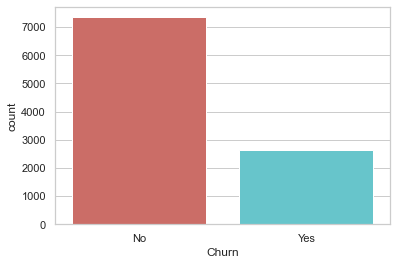

In [26]:
print(df[target].value_counts())
sns.countplot(x=target, data=df, palette='hls')
plt.show()

In [27]:
# calculate balance
count_no_churn = len(df[df[target]=='No'])
count_churn = len(df[df[target]=='Yes'])
pct_of_no_churn = count_no_churn/(count_no_churn+count_churn)
pct_of_churn = count_churn/(count_no_churn+count_churn)
print('% of customers that did not churn: {:.1%}'.format(pct_of_no_churn ))
print('% of customers that did churn: {:.1%}'.format(pct_of_churn ))

% of customers that did not churn: 73.5%
% of customers that did churn: 26.5%


<div class="impact" data-hdr="Unbalanced Data">
    Observe that the target data is not balanced.
  </div>


In [28]:
# describe numerical mean data compared to target
df.groupby(target).mean().round(2).T

Churn,No,Yes
Population,9830.51,9551.46
Children,2.09,2.07
Age,53.01,53.27
Income,39706.40,40085.76
Outage_sec_perweek,10.00,10.00
Email,11.99,12.08
Contacts,0.99,1.01
Yearly_equip_failure,0.40,0.38
Tenure,42.23,13.15
MonthlyCharge,163.01,199.30


<div class="impact" data-hdr="Observations">Observations:
  </div>
<ul class="a">
    <li>The <b>Income</b> of churned customers is slightly higher.
    <li>The <b>Tenure</b> of churned customers is significantly lower.
    <li>The <b>MonthlyCharge</b> of churned customers is considerable higher.
    <li>The <b>Bandwidth_GB_Year</b> is significantly lower.        
</ul>

<h2 data-nbr="Cx">Explore Predictor Data</h2>

<div class="impact" data-hdr="Explore Categorical Data">
    Prior to converting the categorical data for use in the model, as part of exploratory data analysis, I will visualize the original categorical data using a countplot. In a moment, the categorical data will be converted to dummy data and I will lose the original data.
  </div>

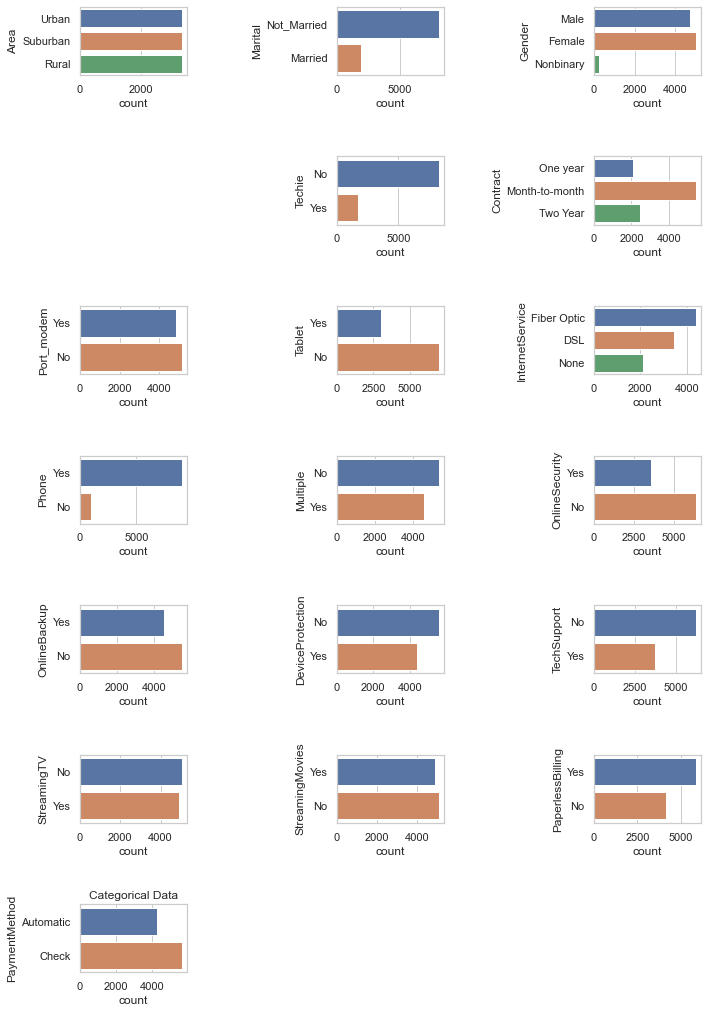

In [29]:
# plot categorical data - before it gets converted
fig = plt.figure(figsize=(10, 20))

for i, col in enumerate(cat_cols):
    if col != target:
        plt.subplot(10, 3, i+1)
        ax = sns.countplot(y=col, data=df)
        fig.tight_layout(h_pad=4, w_pad=4)

plt.title('Categorical Data')
plt.show()

<div class="impact" data-hdr="Explore Categorical Data - Means By Unique Value">
    Show mean values for all categorical unique values compared to other numeric data. Explore mean data for each of the categorical variables using pandas' function .groupby().mean().
  </div>

In [30]:
# print out mean values of numeric data for a given variable 
for c in cat_cols:
    if c != target:
        print('\n\n======================================')
        print('\t{}'.format(c.upper()))
        print('======================================')
        print(df.groupby(c).mean().round(2).T)



	AREA
Area                     Rural  Suburban     Urban
Population             9732.35   9993.76   9542.22
Children                  2.11      2.08      2.07
Age                      52.71     53.23     53.30
Income                39667.13  39909.15  39843.92
Outage_sec_perweek        9.99     10.03      9.99
Email                    12.05     11.98     12.02
Contacts                  1.00      0.99      1.00
Yearly_equip_failure      0.40      0.40      0.39
Tenure                   35.14     34.37     34.07
MonthlyCharge           172.49    172.49    172.90
Bandwidth_GB_Year      3442.81   3380.28   3354.00


	MARITAL
Marital                Married  Not_Married
Population             9743.90      9759.55
Children                  2.11         2.08
Age                      52.84        53.13
Income                40330.36     39683.27
Outage_sec_perweek       10.10         9.98
Email                    12.07        12.00
Contacts                  1.00         0.99
Yearly_equip_fail

<div class="impact" data-hdr="Explore Categorical Data - Grouped Bar Plot with Target Overlay">
    Grouped bar plot of each categorical data with target data overlaid.
  </div>

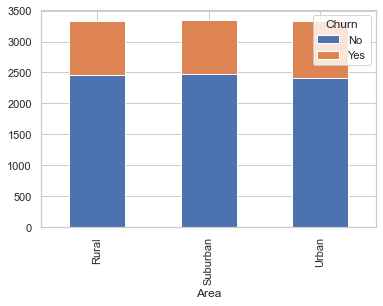

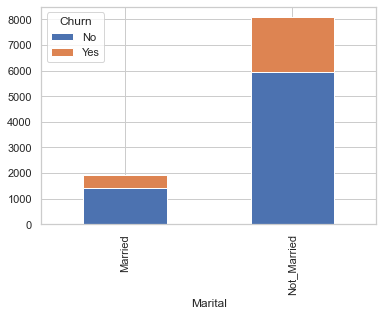

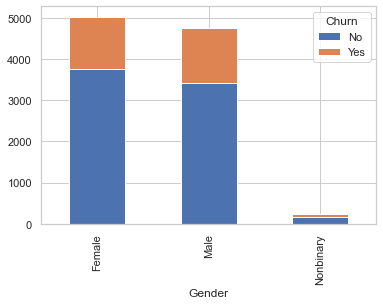

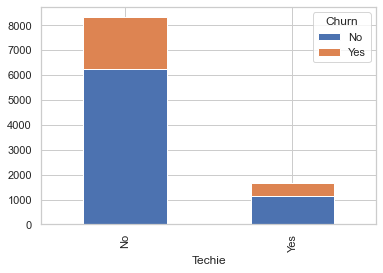

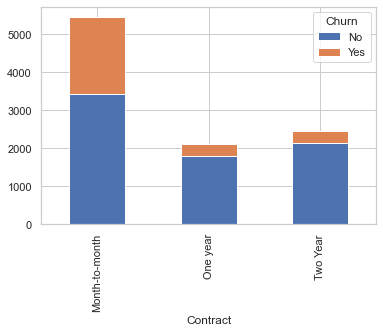

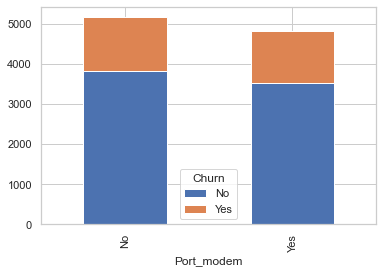

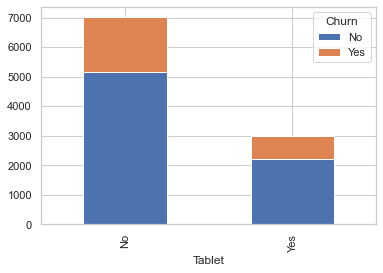

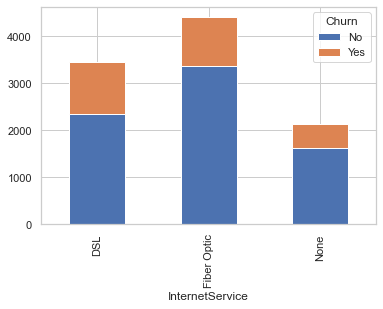

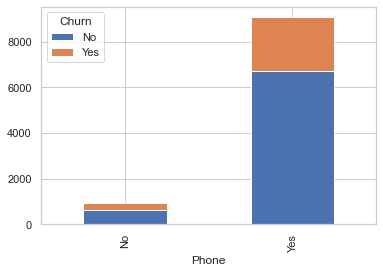

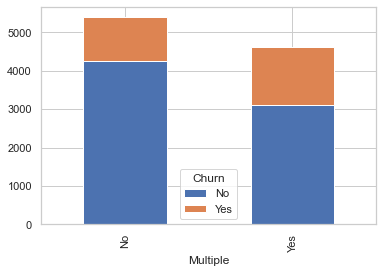

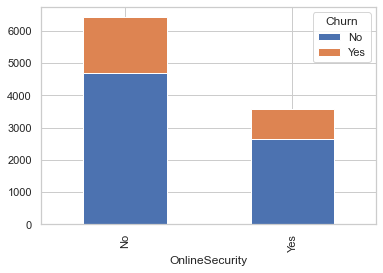

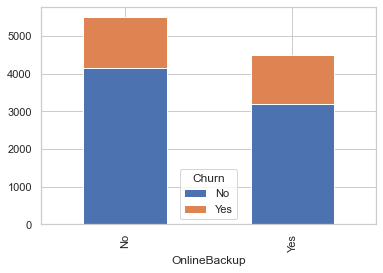

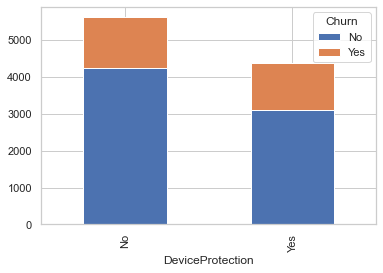

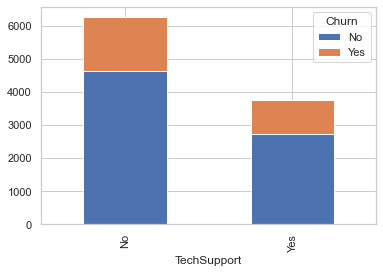

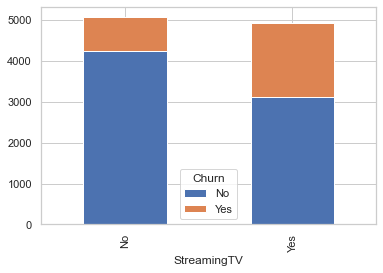

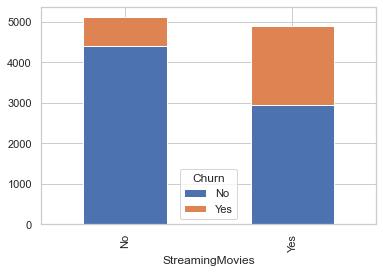

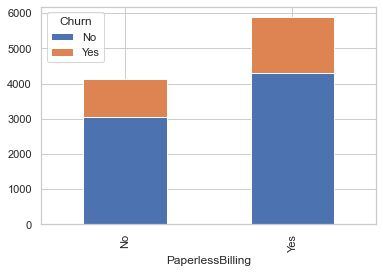

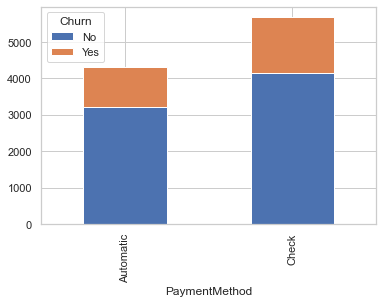

In [31]:
# plot each variable vs. target overlay
for c in cat_cols:
    if c != target:
        plot_stacked(c)

<div class="impact" data-hdr="Good Predictors">Based on the plots, it appears that the following variables might be good predictors of the outcome:</div>
<ul class="a">
    <li><b>Marital</b>
    <li><b>Gender</b>
    <li><b>Techie</b>
    <li><b>Contract</b>
    <li><b>Tablet</b>
    <li><b>InternetService</b>
    <li><b>OnlineSecurity</b> - maybe
    <li><b>OnlineBackup</b> - maybe
    <li><b>TechSupport</b> - maybe
    <li><b>StreamingTV</b>
    <li><b>StreamingMovies</b>
    <li><b>PaperlessBilling</b>
    <li><b>PaymentMethod</b>
</ul>

<div class="impact" data-hdr="Convert Selected Categorical Data">Now that I have selected some of the categorical data that seem to be a good predictors of the outcome, I will convert these categorical data to dummy, numeric data. Each new variable will have a value of either one (1) or zero (0).</div>

In [32]:
# convert categorical data
for c in cat_cols:
    if c in df.columns:
        df = pd.get_dummies(df, columns=[c], drop_first=True)
pred_vars = df.select_dtypes(include="uint8").columns.tolist()
print(pred_vars)

['Area_Suburban', 'Area_Urban', 'Marital_Not_Married', 'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Check']


In [33]:
# reset the global target variable using its dummy variable
target = 'Churn_Yes'

<div class="impact" data-hdr="Describe Numeric Data">Traditional statistics for numeric data.</div>

In [34]:
# describe numeric data
df[num_cols].describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Population,10000.0,9756.562,14432.699,0.000,738.000,2910.500,13168.000,111850.000
Children,10000.0,2.088,2.147,0.000,0.000,1.000,3.000,10.000
Age,10000.0,53.078,20.699,18.000,35.000,53.000,71.000,89.000
Income,10000.0,39806.927,28199.917,348.670,19224.718,33170.605,53246.170,258900.700
Outage_sec_perweek,10000.0,10.002,2.976,0.100,8.018,10.019,11.969,21.207
Email,10000.0,12.016,3.026,1.000,10.000,12.000,14.000,23.000
Contacts,10000.0,0.994,0.988,0.000,0.000,1.000,2.000,7.000
Yearly_equip_failure,10000.0,0.398,0.636,0.000,0.000,0.000,1.000,6.000
Tenure,10000.0,34.526,26.443,1.000,7.918,35.431,61.480,71.999
MonthlyCharge,10000.0,172.625,42.943,79.979,139.979,167.485,200.735,290.160


<div class="impact" data-hdr="Univariate Histogram Plot of Numeric Predictor Data">Here are the histogram plots for numeric data.</div>

<Figure size 720x1440 with 0 Axes>

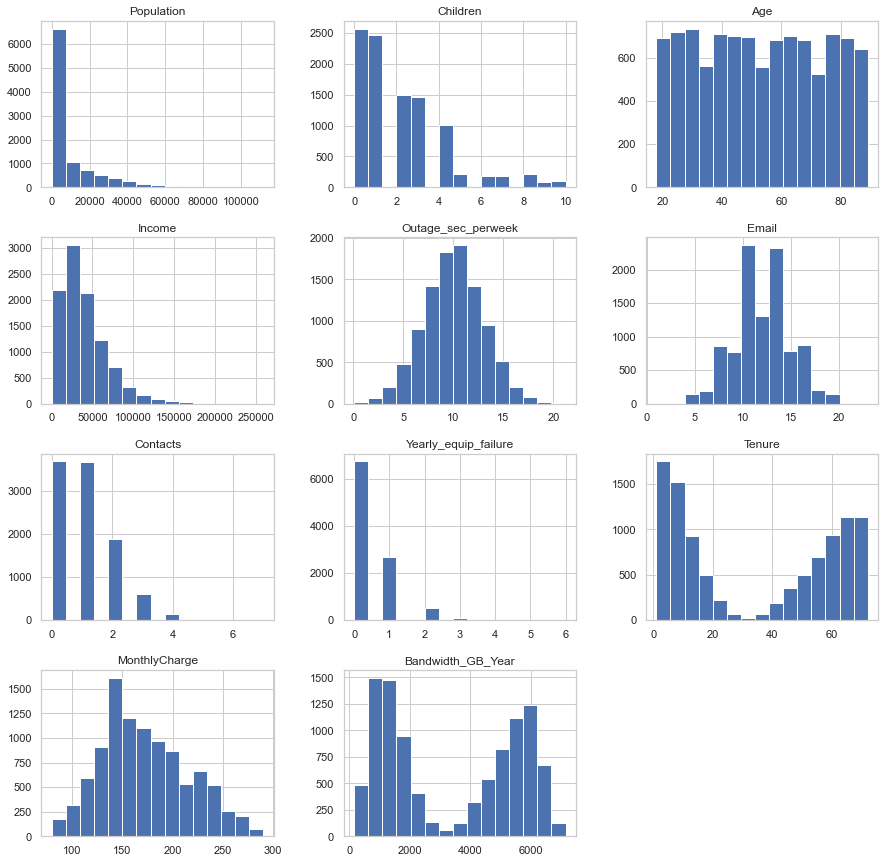

In [35]:
# histogram plot numeric data
fig = plt.figure(figsize=(10, 20))
ax = df[num_cols].hist(bins = 15, figsize=(15,15))
plt.title('Numeric Data')
fig.tight_layout(h_pad=5, w_pad=5)
plt.show()

<div class="impact" data-hdr="Bivariate Barplot of Numeric Predictor Data">Here are the histogram plots for the numeric data. Each of these plots show the frequency counts based on the yes or no value of the target variable.</div>

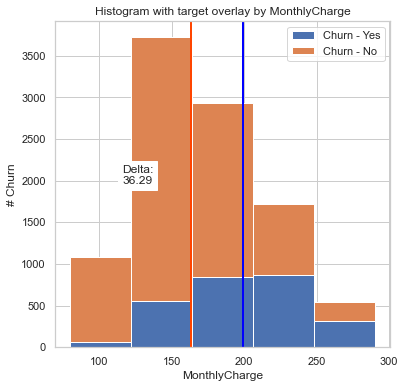

In [36]:
# create histogram with target overlay
plot_histogram('MonthlyCharge')

<div class="impact" data-hdr="Observations">Observations:
  </div>
<ul class="a">
    <li>The mean value for churned customers is 36.29 units higher.      
</ul>

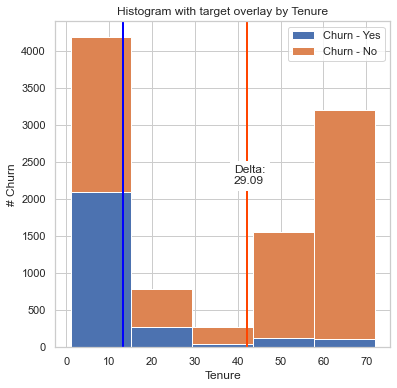

In [37]:
# create histogram with target overlay
plot_histogram('Tenure')

<div class="impact" data-hdr="Observations">Observations:
  </div>
<ul class="a">
    <li>The mean value for churned customers is 29.09 units lower.      
</ul>

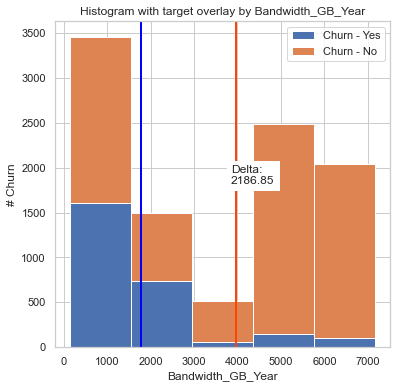

In [38]:
# create histogram with target overlay
plot_histogram('Bandwidth_GB_Year')

<div class="impact" data-hdr="Observations">Observations:
  </div>
<ul class="a">
    <li>The mean value for churned customers is 2186.85 units lower.      
</ul>

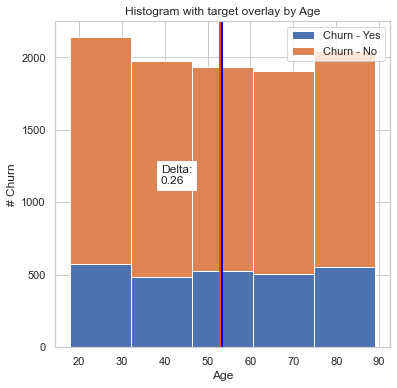

In [39]:
# create histogram with target overlay
plot_histogram('Age')

<div class="impact" data-hdr="Observations">Observations:
  </div>
<ul class="a">
    <li>There appears to be no distinction between churned and non-churned customers.      
</ul>

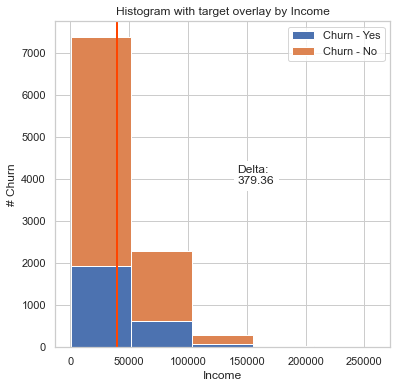

In [40]:
# create histogram with target overlay
plot_histogram('Income')

<div class="impact" data-hdr="Observations">Observations:
  </div>
<ul class="a">
    <li>There appears to be no distinction between churned and non-churned customers.      
</ul>

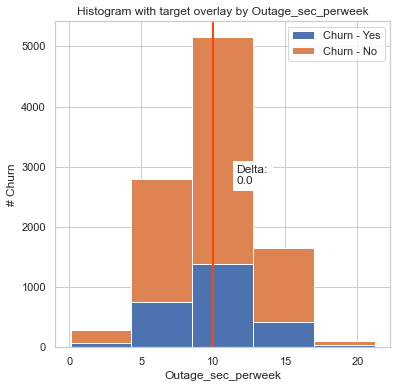

In [41]:
# create histogram with target overlay
plot_histogram('Outage_sec_perweek')

<div class="impact" data-hdr="Observations">Observations:
  </div>
<ul class="a">
    <li>There appears to be no distinction between churned and non-churned customers.      
</ul>

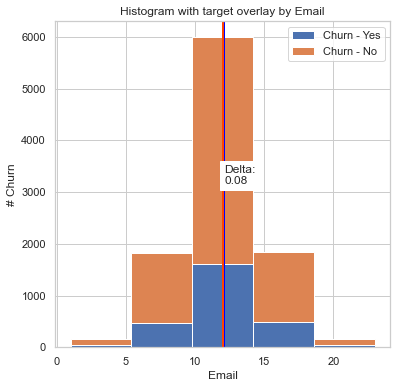

In [42]:
# create histogram with target overlay
plot_histogram('Email')

<div class="impact" data-hdr="Observations">Observations:
  </div>
<ul class="a">
    <li>There appears to be no distinction between churned and non-churned customers.      
</ul>

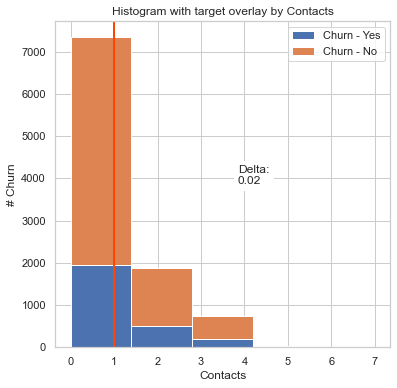

In [43]:
# create histogram with target overlay
plot_histogram('Contacts')

<div class="impact" data-hdr="Observations">Observations:
  </div>
<ul class="a">
    <li>There appears to be no distinction between churned and non-churned customers.      
</ul>

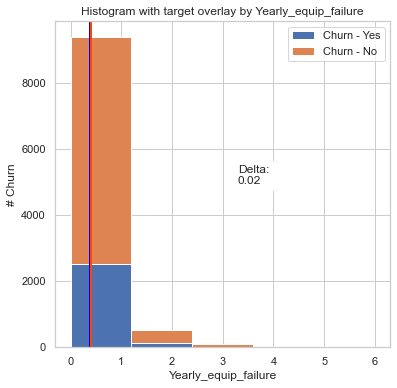

In [44]:
# create histogram with target overlay
plot_histogram('Yearly_equip_failure')

<div class="impact" data-hdr="Observations">Observations:
  </div>
<ul class="a">
    <li>There appears to be no distinction between churned and non-churned customers.      
</ul>

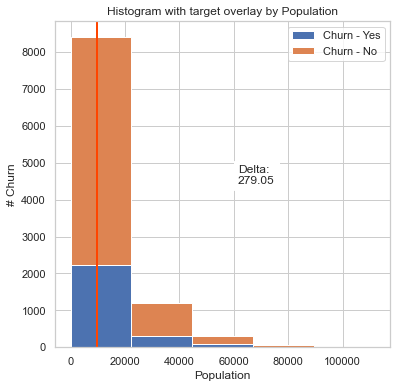

In [45]:
# create histogram with target overlay
plot_histogram('Population')

<div class="impact" data-hdr="Observations">Observations:
  </div>
<ul class="a">
    <li>There appears to be no distinction between churned and non-churned customers.      
</ul>

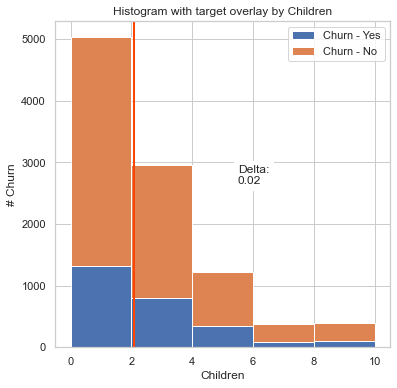

In [46]:
# create histogram with target overlay
plot_histogram('Children')

<div class="impact" data-hdr="Observations">Observations:
  </div>
<ul class="a">
    <li>There appears to be no distinction between churned and non-churned customers.      
</ul>

<div class="impact" data-hdr="Drop Data">Need to get rid of the variable <b>Churn_No</b> in order to prevent collinearity with <b>Churn_Yes</b> </div>

In [47]:
# drop unwanted data
cols_to_be_removed = ['Churn_No']

# print list of dropped data
print('data to be removed: {}'.format(cols_to_be_removed))

# loop through list, if in current df, drop col
for c in cols_to_be_removed:
    if c in df.columns:
        df.drop(columns = c, inplace=True)
        print('Data named [{}] has been removed.'.format(c))

data to be removed: ['Churn_No']


<h2 data-nbr="C5">Provide Copy of Data</h2>

<div class="impact" data-hdr="Final Data">Here is the final list of columns after all data cleaning.</div>

In [48]:
# Provide copy of the prepared data set.
final_data = 'd208_task2_final_data.csv'
df.to_csv(final_data, index=False, header=True)
print('File saved to: {}'.format(final_data))
print(df.columns.to_series().groupby(df.dtypes).groups)

File saved to: d208_task2_final_data.csv
{uint8: ['Area_Suburban', 'Area_Urban', 'Marital_Not_Married', 'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Check'], int64: ['Population', 'Children', 'Age', 'Email', 'Contacts', 'Yearly_equip_failure'], float64: ['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']}


<div class="part">Model Comparison and Analysis</div>

<h2 data-nbr="D1">Initial Model</h2>

<div class="impact" data-hdr="Balance Data">We saw earlier that the data is not balanced, so I am using the SMOTE package to oversample the data in order to balance out the data before running the model.</div>

In [49]:
# rebalance data using SMOTE oversample
X = df.loc[:, df.columns != 'Churn_Yes']
y = df.loc[:, df.columns == 'Churn_Yes']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn_Yes'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no churn in oversampled data",len(os_data_y[os_data_y['Churn_Yes']==0]))
print("Number of churn",len(os_data_y[os_data_y['Churn_Yes']==1]))
print("Proportion of no churn data in oversampled data is ",len(os_data_y[os_data_y['Churn_Yes']==0])/len(os_data_X))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['Churn_Yes']==1])/len(os_data_X))

length of oversampled data is  10298
Number of no churn in oversampled data 5149
Number of churn 5149
Proportion of no churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


<div class="impact" data-hdr="RFE Feature Reduction">RFE in the sklearn package finds and ranks the features with the most potential to the model.</div>

In [50]:
# RFE feature reduction
data_final_vars=df.columns.values.tolist()
y=[target]
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
features =[]
print('The following features are selected:')
for i in range(os_data_X.shape[1]):
    if rfe.support_[i] == True:
        features.append(os_data_X.columns[i])
        print('Column: %d, Rank: %.3f, Feature: %s' % 
          (i, rfe.ranking_[i],
           os_data_X.columns[i]))

p:\code_wgu\5\v\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
p:\code_wgu\5\v\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
p:\code_wgu\5\v\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of itera

The following features are selected:
Column: 4, Rank: 1.000, Feature: Outage_sec_perweek
Column: 5, Rank: 1.000, Feature: Email
Column: 8, Rank: 1.000, Feature: Tenure
Column: 9, Rank: 1.000, Feature: MonthlyCharge
Column: 11, Rank: 1.000, Feature: Area_Suburban
Column: 12, Rank: 1.000, Feature: Area_Urban
Column: 13, Rank: 1.000, Feature: Marital_Not_Married
Column: 15, Rank: 1.000, Feature: Gender_Nonbinary
Column: 16, Rank: 1.000, Feature: Techie_Yes
Column: 17, Rank: 1.000, Feature: Contract_One year
Column: 18, Rank: 1.000, Feature: Contract_Two Year
Column: 20, Rank: 1.000, Feature: Tablet_Yes
Column: 21, Rank: 1.000, Feature: InternetService_Fiber Optic
Column: 22, Rank: 1.000, Feature: InternetService_None
Column: 23, Rank: 1.000, Feature: Phone_Yes
Column: 24, Rank: 1.000, Feature: Multiple_Yes
Column: 25, Rank: 1.000, Feature: OnlineSecurity_Yes
Column: 26, Rank: 1.000, Feature: OnlineBackup_Yes
Column: 27, Rank: 1.000, Feature: DeviceProtection_Yes
Column: 28, Rank: 1.000, F

p:\code_wgu\5\v\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
p:\code_wgu\5\v\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

<div class="impact" data-hdr="Intial Model">Use the RFE features analysis above to select the best features for the initial iteration of the model.</div>

In [51]:
# initial model
X=os_data_X[features] # from RFE above
Xc = sm.add_constant(X) # reset
y=os_data_y[target]
logit_model=sm.Logit(y,Xc)
result=logit_model.fit()
print(result.summary2())

p:\code_wgu\5\v\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                               Results: Logit
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2021-10-11 03:50      BIC:                   inf   
No. Observations:        10298                 Log-Likelihood:        -inf  
Df Model:                20                    LL-Null:               0.0000
Df Residuals:            10277                 LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          9.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
const     

p:\code_wgu\5\v\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
p:\code_wgu\5\v\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
p:\code_wgu\5\v\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
p:\code_wgu\5\v\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
p:\code_wgu\5\v\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
p:\code_wgu\5\v\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse 

<div class="impact" data-hdr="Confusion Matrix - Initial Model">Display confusion matrix of the test and prediction data from the intial model.</div>

p:\code_wgu\5\v\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


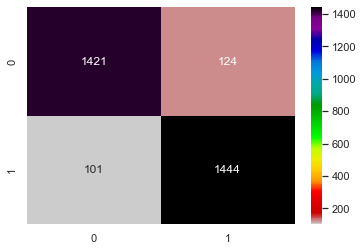

In [52]:
# confustion matrix for initial model

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
predicted = lgr.predict(X_test)
expected = y_test
confusion = pd.DataFrame(confusion_matrix(y_true=expected, y_pred=predicted),
                    index=range(2),columns=range(2))
axes = sns.heatmap(confusion, annot=True,cmap='nipy_spectral_r', fmt='g')

In [53]:
# calculate number and percent of predictions
correct = sum(np.diagonal(confusion)) # on diag
total = confusion.values.sum()
incorrect = total - correct # off diag
print('Correct predictions on diagonal: {} ({:.0%})'.format( correct, correct / total ))
print('Incorrect predictions off diagonal: {} ({:.0%})'.format( incorrect, incorrect / total )) 

Correct predictions on diagonal: 2865 (93%)
Incorrect predictions off diagonal: 225 (7%)


<div class="impact" data-hdr="High Coorelation">Use coorelation matrix to find predictor pairs with high coorelation.</div>

In [54]:
# find predictor pairs with high coorelation
#custom_corr_matrix(X,'Model_2')
get_top_abs_correlations(X, 20)

Area_Suburban                Area_Urban                     0.359
InternetService_Fiber Optic  InternetService_None           0.318
MonthlyCharge                Multiple_Yes                   0.287
                             InternetService_None           0.266
Contract_One year            Contract_Two Year              0.187
MonthlyCharge                OnlineBackup_Yes               0.168
                             InternetService_Fiber Optic    0.161
Tenure                       Contract_Two Year              0.140
                             OnlineSecurity_Yes             0.108
                             OnlineBackup_Yes               0.106
                             InternetService_Fiber Optic    0.105
                             Contract_One year              0.099
                             Area_Suburban                  0.097
Contract_Two Year            InternetService_Fiber Optic    0.096
Tenure                       Area_Urban                     0.089
Contract_T

<h2 data-nbr="D3">Reduced Model</h2>

<div class="impact" data-hdr="Final Model">Remove features with high P-values or high multi-collinearity. It looks like there are a few of the input variables that have high multi-collinearity. Then re-run the model.</div>

In [55]:
# update model
features.remove('Gender_Nonbinary') # high p-value
features.remove('Outage_sec_perweek') # high p-value
features.remove('Email') # high p-value
features.remove('Marital_Not_Married') # high p-value
features.remove('Area_Urban') # high collinearity
features.remove('InternetService_None') # high collinearity
X=os_data_X[features]
y=os_data_y[target]
Xc = sm.add_constant(X) # reset
logit_model=sm.Logit(y,Xc)
result=logit_model.fit()
print(result.summary2())

p:\code_wgu\5\v\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                               Results: Logit
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2021-10-11 03:50      BIC:                   inf   
No. Observations:        10298                 Log-Likelihood:        -inf  
Df Model:                14                    LL-Null:               0.0000
Df Residuals:            10283                 LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          9.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
const     

p:\code_wgu\5\v\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
p:\code_wgu\5\v\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
p:\code_wgu\5\v\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
p:\code_wgu\5\v\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
p:\code_wgu\5\v\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
p:\code_wgu\5\v\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse 

<div class="impact" data-hdr="Confusion Matrix - Final Model">Display confusion matrix of the test and prediction data.</div>

p:\code_wgu\5\v\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


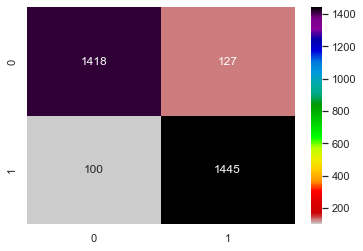

In [56]:
# confustion matrix for final model
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
predicted = lgr.predict(X_test)
expected = y_test
confusion = pd.DataFrame(confusion_matrix(y_true=expected, y_pred=predicted),
                    index=range(2),columns=range(2))
axes = sns.heatmap(confusion, annot=True,cmap='nipy_spectral_r', fmt='g')

In [57]:
# calculate number and percent of predictions
correct = sum(np.diagonal(confusion)) # on diag
total = confusion.values.sum()
incorrect = total - correct # off diag
print('Correct predictions on diagonal: {} ({:.0%})'.format( correct, correct / total ))
print('Incorrect predictions off diagonal: {} ({:.0%})'.format( incorrect, incorrect / total )) 

Correct predictions on diagonal: 2863 (93%)
Incorrect predictions off diagonal: 227 (7%)


<div class="impact" data-hdr="Classification Report">Classification report below:</div>

In [58]:
# classification report
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1545
           1       0.92      0.94      0.93      1545

    accuracy                           0.93      3090
   macro avg       0.93      0.93      0.93      3090
weighted avg       0.93      0.93      0.93      3090



<div class="impact" data-hdr="ROC Curve">ROC curve below:</div>

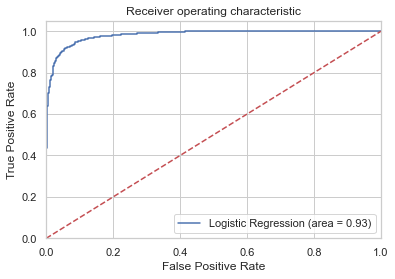

In [59]:
# plot ROC Curve
logit_roc_auc = roc_auc_score(y_test, lgr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lgr.predict_proba(X_test)
[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

According to Li (2017), "The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. The dotted line represents the ROC curve of a purely random
classifier; a good classifier stays as far away from that line as possible (toward the topleft
corner)." It looks like we have generated a good model.

<div class="apa" data-author="Li, S." data-date="2017, Sep 28" data-url="https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8">Building A Logistic Regression in Python, Step by Step</div>

<h2 data-nbr="E1">Explain</h2>

The features or input variables used for the initial model were selected using the RFE selection process.

Both models have about the same number of correct predictions, about 93%. However, the final model removed some of the input variables that had high multicollinearity and another couple removed because of high p-value. The reduced model is cleaner but has about the same results.

<h2 data-nbr="E2">Provide output and calculations</h2>

<div class="impact" data-hdr="Output">All output and calculations are provided within this Jupyter notebook.</div>

<h2 data-nbr="E3">Provide code</h2>

<div class="impact" data-hdr="Code">All code is provided within this Jupyter notebook. There is a .PDF file of the final notebook and the .IPYNB file submitted with the assignment which has all of the code input and outputs.</div>

<div class="part">Data Summary and Implications</div>

<h2 data-nbr="F1">Discuss Results</h2>

<div class="quote"><div class="impact" data-hdr="F1">Summarize your findings and assumptions by doing the following:
1.  Discuss the results of your data analysis, including the following elements:
•  a regression equation for the reduced model
•  an interpretation of coefficients of the statistically significant variables of the model
•  the statistical and practical significance of the model
•  the limitations of the data analysis</div></div>

<div class="impact" data-hdr="Regression Equation">Here is the regression equation of the reduced model:</div>

In [60]:
# equation of the regression line/plane
print('Logit: {:.2f}'.format(logit_roc_auc))
equation = result.summary2().tables[1]
print('Estimate [{}] as L = '.format(result.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.3f} x ( {} ) '.format(i[1],i[0]))

Logit: 0.93
Estimate [Churn_Yes] as L = 
   -6.209 x ( const ) 
   -0.129 x ( Tenure ) 
   +0.075 x ( MonthlyCharge ) 
   -0.452 x ( Area_Suburban ) 
   +0.974 x ( Techie_Yes ) 
   -4.002 x ( Contract_One year ) 
   -4.036 x ( Contract_Two Year ) 
   -0.357 x ( Tablet_Yes ) 
   -2.881 x ( InternetService_Fiber Optic ) 
   -0.587 x ( Phone_Yes ) 
   -0.842 x ( Multiple_Yes ) 
   -0.612 x ( OnlineSecurity_Yes ) 
   -0.968 x ( OnlineBackup_Yes ) 
   -0.674 x ( DeviceProtection_Yes ) 
   -1.014 x ( TechSupport_Yes ) 


<div class="impact" data-hdr="Interpret Logistic Regression Coefficients">Each regression coefficient describes the estimated change in the log-odds of the response variable when the coefficient's predictor variable increases by one. (LaRose, 2019)</div>

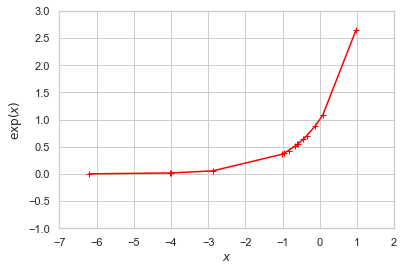

In [61]:
# visualization of the log coef using exp(x) plot
import matplotlib.pyplot as plt
X_coeff = []
for i in equation.itertuples():
    X_coeff.append(i[1])
X_coeff.sort()
x = X_coeff
y = np.exp(x)
plt.figure()
plt.plot(X_coeff, y, color="red", marker="+")
plt.xlim([-7.0, 2.0])
plt.ylim([-1.0, 3.0])
plt.xlabel('$x$')
plt.ylabel('$\exp(x)$')
plt.show()

Here are a few specific examples:

<div class="impact" data-hdr="Techie_Yes">Consider the binary predictor variable <b>Techie_Yes</b> The regression coefficient is +0.974. By calculating $e^{0.974}=2.648$, we find that a customer is about 2.6 times as likely to churn if they are a "techie" compared to if they are not.</div>

<div class="impact" data-hdr="MonthlyCharge">Consider the binary predictor variable <b>MonthlyCharge</b> The regression coefficient is +0.075. By calculating $e^{0.075}=1.079$, we find that a customer is about 1.1 times as likely to churn for every 1 unit of increase in <b>MonthlyCharge</b>.</div>

<div class="impact" data-hdr="Plus/Minus">You see some of the coefficients are positive and some negative, the positive factors indicate higher likelihood of churn and the negative factor indicate lower likelihood of churn. You can see that +0.974 <b>Techie_Yes</b> will cancel out with the -0.968 if the customer has the <b>OnlineBackup_Yes</b> service.</div>

<h2 data-nbr="F2">Recommendations</h2>

<div class="quote"><div class="impact" data-hdr="F2">Recommend a course of action based on your results.</div></div>

<div class="impact" data-hdr="Recommendations">Customers will be less likely to churn if their <b>MonthlyCharge</b> is minimized and if the customer has any of the additionaly available services. Focus marketing efforts on which additional services are best for each customer, maybe bundle some of the services at a slightly reduced monthly payment.  Increase customers' awareness of the value of the additional services for what they are paying each month. Keeping their monthly payment low and increasing the number of extra services will minimize likelihood of churn, and provide company with increase in the customer lifetime revenue.</div>

<div class="part">Demonstration</div>

<h2 data-nbr="G">Video</h2>

<div class="quote"><div class="impact" data-hdr="G">Provide a Panopto video recording that includes all of the following elements:
•  a demonstration of the functionality of the code used for the analysis
•  an identification of the version of the programming environment
•  a comparison of the two logistic regression models you used in your analysis
•  an interpretation of the coefficients
</div></div>

Video was created and posted to the WGU class dropbox.

Here is the link https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=a90e1811-2440-4e27-a081-adbb01855443